# 在Class中实现

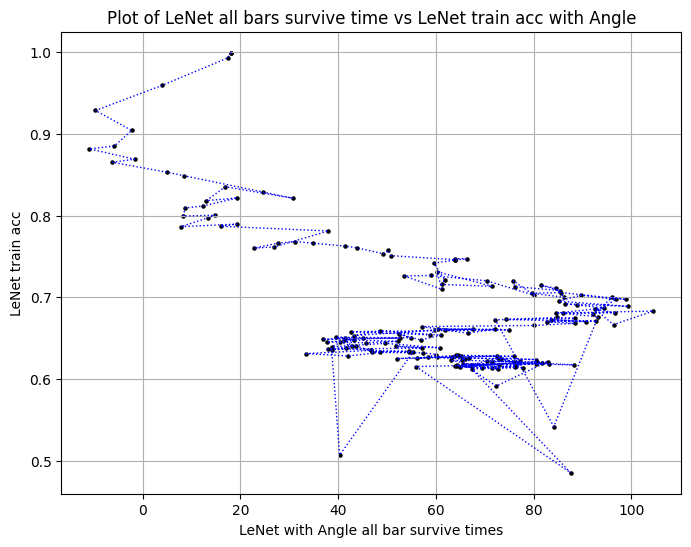

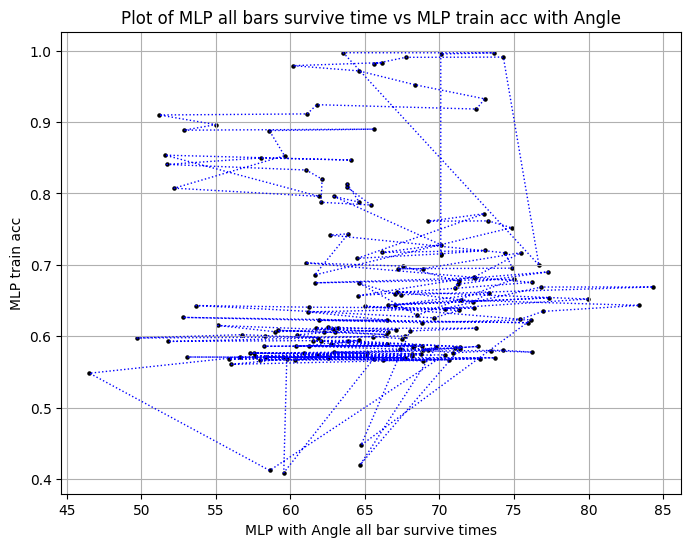

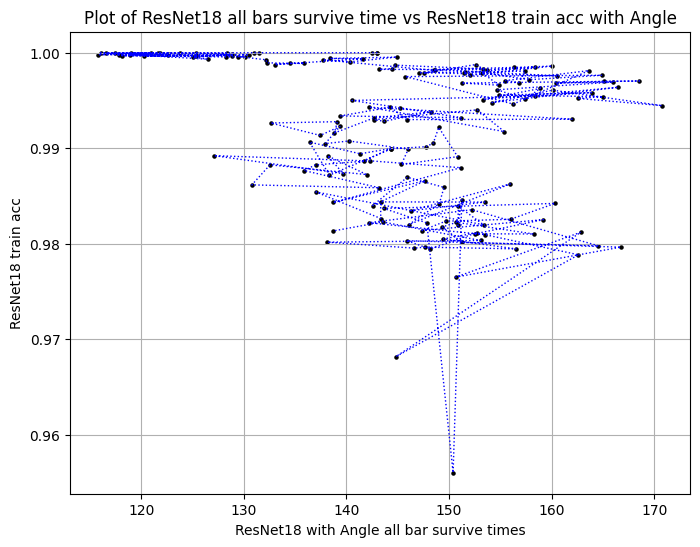

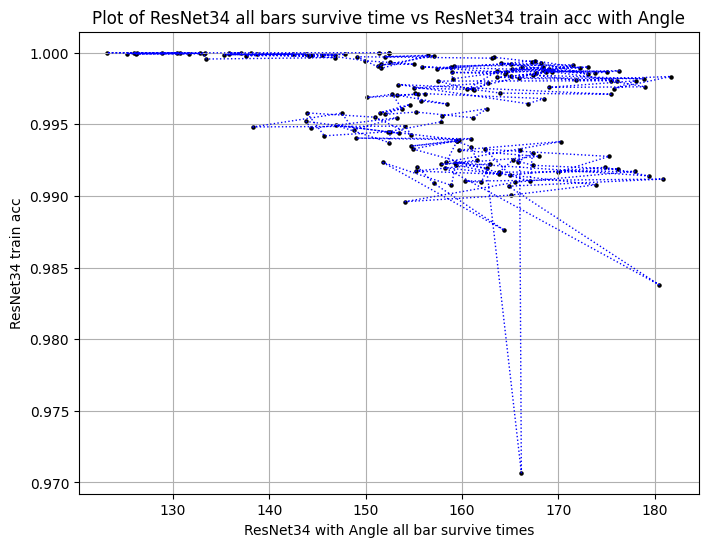

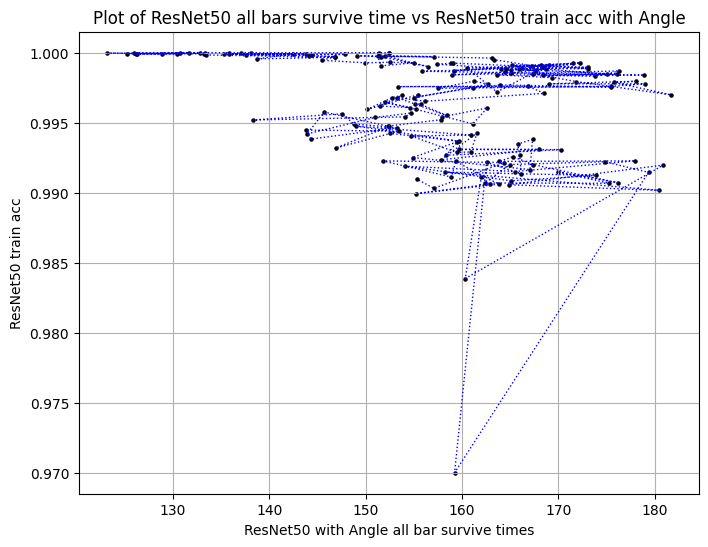

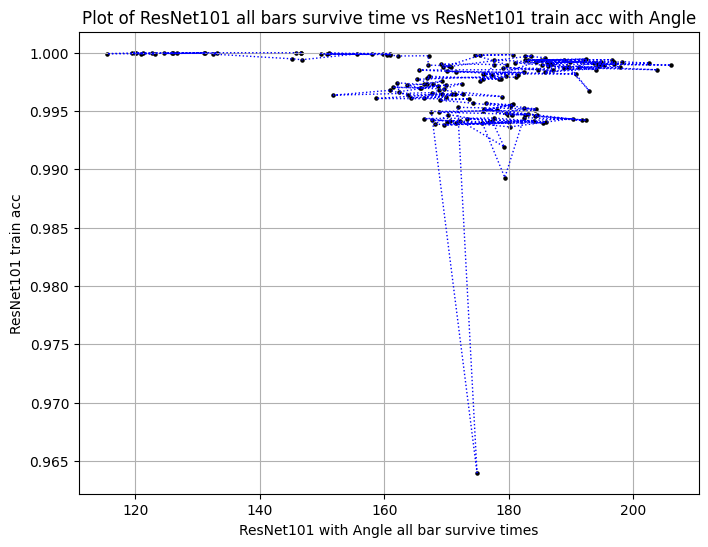

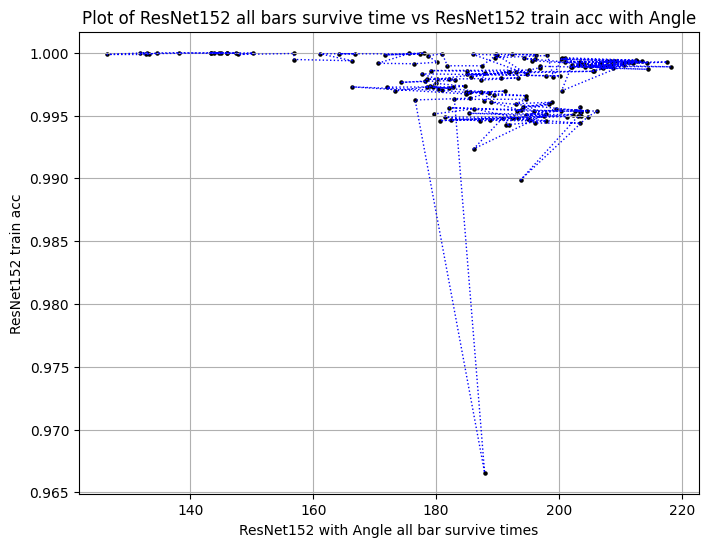

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

class Plotter:
    def __init__(self, tda_path, acc_path, sheet_name, save_path):
        self.tda_path = tda_path
        self.acc_path = acc_path
        self.tda_sheet_name = sheet_name
        self.acc_sheet_name = sheet_name
        self.save_path = save_path
        # 确保保存路径存在，如果不存在则创建
        if not os.path.exists(self.save_path):
            os.makedirs(self.save_path)
    def load_dataframes(self):
        # 读取 Excel 文件为 DataFrame
        self.df_TDA = pd.read_excel(self.tda_path, sheet_name=self.tda_sheet_name)
        self.df_acc = pd.read_excel(self.acc_path, sheet_name=self.acc_sheet_name).iloc[:, 1:]

    def generate_plots(self):
        # 假设 df 是你从 Excel 文件中读取的 DataFrame
        # print("执行减法之前：\n")
        # print(self.df_TDA)
        # 选择第一列作为被减数
        subtrahend = self.df_TDA.iloc[:, 1]

        # 选择其他列作为减数
        minuend = self.df_TDA.iloc[:, 1:]  # 这里假设你想要减去除了第一列以外的所有列

        # 执行减法操作
        result_df = minuend.sub(subtrahend, axis=0)  # 在行的方向上执行减法

        # 添加新的列到结果 DataFrame
        result_df.columns = [f"{col}" for col in minuend.columns]

        # 删除第一列
        # print("执行减法之后：\n")
        # print(result_df)
        tda_result_df = result_df.drop(result_df.columns[0], axis=1)
        self.tda_result_df = tda_result_df

        # 确保两个 DataFrame 的列数相同
        if len(self.tda_result_df.columns) != len(self.df_acc.columns):
            raise ValueError("两个 DataFrame 的列数不相同")

        # 获取列名列表
        tda_columns = self.tda_result_df.columns
        acc_columns = self.df_acc.columns

        # 遍历每一列并绘制图像
        for tda_col, acc_col in zip(tda_columns, acc_columns):
            # 获取数据并绘图
            tda_data = self.tda_result_df[tda_col]
            acc_data = self.df_acc[acc_col]

            # 绘制图像
            plt.figure(figsize=(8, 6))  # 设置图像大小
            plt.scatter(tda_data, acc_data, marker='o', s=5, color='black')  # 绘制其余点
            plt.plot(tda_data, acc_data, linestyle=':', linewidth=1, color='blue')  # 绘制图像

            plt.xlabel(f"{tda_col} with {self.acc_sheet_name} all bar survive times")  # 设置横坐标标签
            plt.ylabel(f"{acc_col} train acc")  # 设置纵坐标标签
            plt.title(f"Plot of {tda_col} all bars survive time vs {acc_col} train acc with {self.acc_sheet_name}")  # 设置图像标题
            plt.grid(True)  # 添加网格线
            plt.savefig(f"{self.save_path}/{tda_col}_{acc_col}_{self.acc_sheet_name}_plot.png")  # 保存图片
            plt.show()
            plt.close()  # 关闭图像

# 使用示例
tda_excel_path = '.\\Result\\NetTDA_2_0th\\model_TDA.xlsx'
acc_excel_path = '.\\Result\\WuyangResnet\\ResNetAcc20231223\\best_train_acc.xlsx'

plotter = Plotter(tda_excel_path, acc_excel_path, 'Angle', './Result/compare_TDA_ACC/saved_plots')
plotter.load_dataframes()
plotter.generate_plots()
# print(plotter.tda_result_df.head())